# Employee Turnover Analytics.
Course-end Project 2
## Description

Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.

Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.

As the ML Developer assigned to the HR Department, you have been asked to create ML programs to:

1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset description
|Column Name | Description|
|--|--|
|satisfaction_level | Satisfaction level at the job of an employee|
last_evaluation |Rating between 0 and 1, received by an employee at his last evaluation
number_project |The number of projects an employee is involved in
average_montly_hours | Average number of hours in a month spent by an employee at the office
time_spend_company |Number of years spent in the company
Work_accident |0 - no accident during employee stay, 1 - accident during employee stay
left | 0 indicates an employee stays with the company and 1 indicates an employee left the company
promotion_last_5years | Number of promotions in his stay
Department | Department to which an employee belongs to
salary | Salary in USD

In [3]:
# Load the dataset
filepath = 'data/HR_comma_sep.csv'
df = pd.read_csv(filepath)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# 1. Data Quality Check
print("Missing values:\n", df.isnull().sum())

Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [13]:
# convert object into numeric types
print(df['salary'].unique())
print(df['department'].unique())

['low' 'medium' 'high']
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [14]:
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df['department'] = df['department'].map({'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9})

No null values.

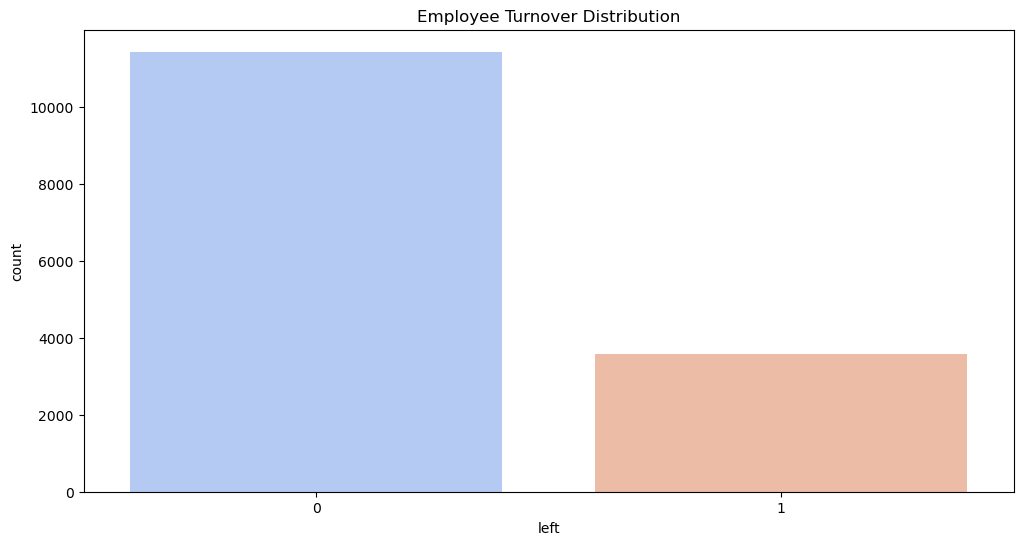

In [15]:
# 2. EDA
# Target Feature
plt.figure(figsize=(12,6))
sns.countplot(x='left', hue='left', data=df, palette='coolwarm', legend=False)
plt.title("Employee Turnover Distribution")
plt.show()

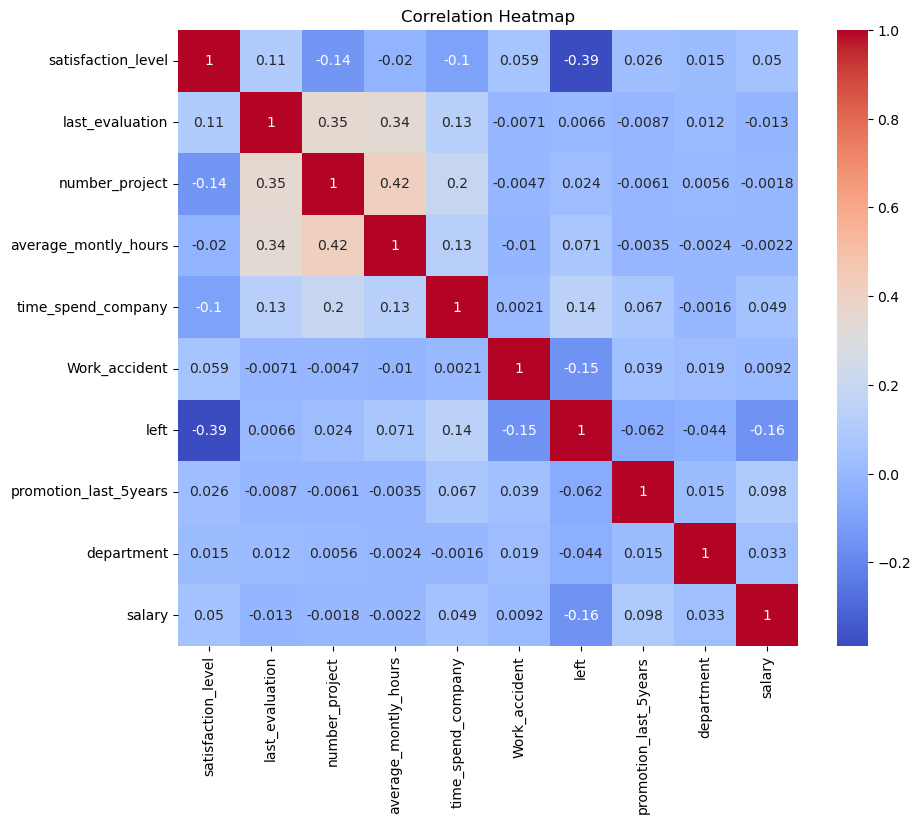

In [16]:
# 2.1. Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Observations
1. **Satisfaction Level and Leaving**:
   - There is a strong negative correlation between `satisfaction_level` and `left` (-0.388375). This suggests that employees with lower satisfaction levels are more likely to leave the company.

2. **Time Spent at Company and Leaving**:
   - There is a positive correlation between `time_spend_company` and `left` (0.144822). This indicates that employees who have spent more time at the company are more likely to leave.

3. **Work Accident and Leaving**:
   - There is a negative correlation between `Work_accident` and `left` (-0.154622). This suggests that employees who have had work accidents are less likely to leave the company.

4. **Salary and Leaving**:
   - There is a negative correlation between `salary` and `left` (-0.157898). This indicates that employees with higher salaries are less likely to leave the company.

5. **Number of Projects and Average Monthly Hours**:
   - There is a strong positive correlation between `number_project` and `average_montly_hours` (0.417211). This suggests that employees working on more projects tend to have higher average monthly hours.

6. **Last Evaluation and Number of Projects**:
   - There is a positive correlation between `last_evaluation` and `number_project` (0.349333). This indicates that employees with higher last evaluation scores tend to be involved in more projects.

7. **Promotion in Last 5 Years and Salary**:
   - There is a positive correlation between `promotion_last_5years` and `salary` (0.098119). This suggests that employees who have been promoted in the last 5 years tend to have higher salaries.